In [77]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd
import csv
import os

In [78]:
csvpath = ("city_data.csv")
csvpath2= ("ride_data.csv")

df = pd.read_csv(csvpath)
df2 = pd.read_csv(csvpath2)

In [79]:
merge_df = pd.merge(df, df2, on=["city"], how= 'inner')
merge_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [124]:
merge_df.reset_index(drop=True)

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829
5,Kelseyland,63,Urban,2016-10-24 15:15:46,33.56,4797969661996
6,Kelseyland,63,Urban,2016-06-06 13:54:23,20.81,9811478565448
7,Kelseyland,63,Urban,2016-08-10 07:02:40,44.53,1563171128434
8,Kelseyland,63,Urban,2016-07-05 17:37:13,29.02,6897992353955
9,Kelseyland,63,Urban,2016-04-25 02:18:31,20.05,1148374505062


In [155]:
rural_df = merge_df[merge_df.type == 'Rural']
clean_rural = rural_df.reset_index(drop=True)
rural_group = clean_rural.groupby(['city',"driver_count"]).fare.agg(("count", "mean","sum"))
rural_group


,,count,mean,sum
city,driver_count,,,
East Leslie,9,11,33.660909,370.27
East Stephen,6,10,39.053000,390.53
East Troybury,3,7,33.244286,232.71
Erikport,3,8,30.043750,240.35
Hernandezshire,10,9,32.002222,288.02
Horneland,8,4,21.482500,85.93
Jacksonfort,6,6,32.006667,192.04
Kennethburgh,3,10,36.928000,369.28
Kinghaven,3,6,34.980000,209.88


In [250]:
rural_driver = rural_group.reset_index()
rural_driver['count']
None

In [82]:
urban_df = merge_df[merge_df.type == 'Urban']
clean_urban = urban_df.reset_index(drop=True)
urban_group = clean_urban.groupby(['city',"driver_count"]).fare.agg(("count", "mean","sum"))
urban_group.head()

,,count,mean,sum
city,driver_count,,,
Alvarezhaven,21,31,23.928710,741.79
Alyssaberg,67,26,20.609615,535.85
Antoniomouth,21,22,23.625000,519.75
Aprilchester,49,19,21.981579,417.65
Arnoldview,41,31,25.106452,778.30


In [149]:
urban_driver = urban_group.reset_index()
urban_driver['driver_count']
None

In [83]:
suburban_df = merge_df[merge_df.type == 'Suburban'] 
clean_suburb = suburban_df.reset_index(drop=True) 
suburb_group= clean_suburb.groupby(['city',"driver_count"]).fare.agg(("count", "mean","sum")) 
suburb_group.head()

,,count,mean,sum
city,driver_count,,,
Anitamouth,16,9,37.315556,335.84
Campbellport,26,15,33.711333,505.67
Carrollbury,4,10,36.606000,366.06
Clarkstad,21,12,31.051667,372.62
Conwaymouth,18,11,34.591818,380.51


In [197]:
suburb_driver = suburb_group.reset_index()
suburb_driver['driver_count']
suburb_driver.head()

,city,driver_count,count,mean,sum
0,Anitamouth,16,9,37.315556,335.84
1,Campbellport,26,15,33.711333,505.67
2,Carrollbury,4,10,36.606000,366.06
3,Clarkstad,21,12,31.051667,372.62
4,Conwaymouth,18,11,34.591818,380.51


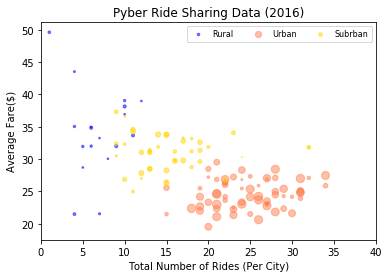

In [253]:
#plt.figure(figsize= (3,3))
#purlple
x1 = rural_driver['count']
y1=  rural_driver['mean']

#green
x2= urban_driver['count']
y2 = urban_driver['mean']

#red
x3 = suburb_driver['count']
y3 = suburb_driver['mean']



rural = plt.scatter(x1, y1, s=rural_driver['driver_count'], c= 'blue', alpha=0.5)
urban = plt.scatter(x2, y2, s=urban_driver['driver_count'], c= 'coral', alpha=0.5)
suburbs = plt.scatter(x3, y3, s=suburb_driver['driver_count'], c= 'gold', alpha=0.5)

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.xlim(0, 40)
plt.title("Pyber Ride Sharing Data (2016)")
plt.legend((rural, urban, suburbs),
           ('Rural', 'Urban', 'Subrban'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=8)
plt.show()

In [85]:
clean_df = merge_df.drop_duplicates(["city"])

other_df = clean_df.reset_index(drop=True)

other_df.groupby(['city', 'driver_count']).sum().head()

,,fare,ride_id
city,driver_count,,
Alvarezhaven,21,31.93,4267015736324
Alyssaberg,67,35.61,7474701747862
Anitamouth,16,43.54,2473012019465
Antoniomouth,21,19.91,644874337642
Aprilchester,49,20.29,1081687614611


In [86]:
#citytype = merge_df.groupby(merge_df['type']).nunique()
#citytype

In [207]:
per_city = merge_df.groupby(["type"]).fare.agg(('count','sum'))
per_city_df = pd.DataFrame(per_city)
type_df = per_city_df.reset_index()
total_count = type_df['count'].sum()
total_sum = type_df['sum'].sum()

type_df["Percent of Total Rides"] = (type_df['count'] / total_count)
type_df["Percent of Total Fare"] = (type_df['sum'] / total_sum)

type_df.head()




,type,count,sum,Percent of Total Rides,Percent of Total Fare
0,Rural,125,4255.09,0.051932,0.065798
1,Suburban,657,20335.69,0.272954,0.314458
2,Urban,1625,40078.34,0.675114,0.619745


In [164]:
#final_df = per_city_df.reset_index()
#final_df
#matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, hold=None, data=None)


In [165]:
totalfare = (urban_group['sum'].sum() + suburb_group['sum'].sum() + rural_group['sum'].sum())
totalfare
None

In [208]:
#xlist = (urban_group['sum'].sum()  suburb_group['sum'].sum() + rural_group['sum'].sum())
#labels = type_df['type']
#plt.pie(
    
    #per_city_df
    # with the labels being officer names
    #labels = labels
    # with no shadows
    #shadow=False,
    # with colors
    #colors=colors,
    # with one slide exploded out
    #explode=(0, 0, 0, 0, 0.15),
    # with the start angle at 90%
    #startangle=90,
    # with the percent listed as a fraction
    #autopct='%1.1f%%',)
    

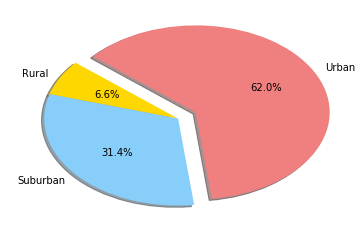

In [227]:
labels= type_df['type']
x = type_df["Percent of Total Fare"] 
explode=(0, 0, 0.15)
colors = ("gold", "lightskyblue", "lightcoral")

plt.pie(x, labels = labels, explode = explode, colors= colors, shadow = True, startangle=140, autopct='%1.1f%%')

plt.show()


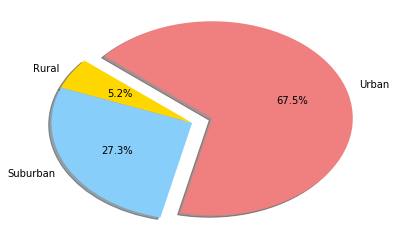

In [225]:
labels= type_df['type']
x = type_df["Percent of Total Rides"] 
explode=(0, 0, 0.15)
colors = ("gold", "lightskyblue", "lightcoral")

plt.pie(x, labels = labels, explode = explode, colors= colors, shadow = True, startangle=140, autopct='%1.1f%%')
plt.axis('tight')

plt.show()

In [248]:
driver_type = merge_df.drop_duplicates("city")
driver_type = driver_type.groupby(["type"]).driver_count.agg(('sum', "mean"))
final_driver =driver_type.reset_index()
total_driver = final_driver['sum'].sum()
final_driver['Percent of Total Drivers'] = (final_driver['sum'] / total_driver) 
final_driver


,type,sum,mean,Percent of Total Drivers
0,Rural,104,5.777778,0.031082
1,Suburban,635,15.487805,0.189779
2,Urban,2607,39.500000,0.779139


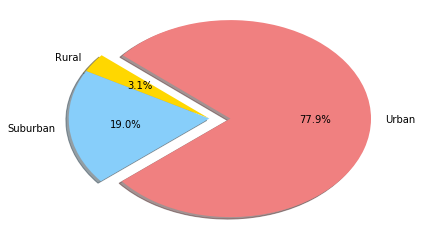

In [249]:
labels= final_driver['type']
x = final_driver["Percent of Total Drivers"] 
explode=(0, 0, 0.15)
colors = ("gold", "lightskyblue", "lightcoral")

plt.pie(x, labels = labels, explode = explode, colors= colors, shadow = True, startangle=140, autopct='%1.1f%%')
plt.axis('tight')

plt.show()